# 추론 통계 (Predictive Analysis)
- 일부 데이터로부터 전체의 통계적 성질을 추측
- 표본 정보(통계량)에 입각하여 모집단의 정보를 얻어내는 과정

    - 추정 : 점추정 , 구간추정
    - 검정 : 가설검정

In [22]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision' , 3)

from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/hspar/Desktop/HS_Park/멀티캠퍼스/data/ch4_scores400.csv')
scores = df['score']
scores[:10]


0    76
1    55
2    80
3    80
4    74
5    61
6    81
7    76
8    23
9    80
Name: score, dtype: int64

In [5]:
# 복원추출 : 동일한 숫자가 추출 될 수 있음
np.random.choice([1,2,3] , 3)

array([2, 2, 2])

In [6]:
# 비복원 추출 : 동일한 숫자가 추출 되지 않는다.

np.random.choice([1,2,3], 3 , replace = False)

array([3, 1, 2])

In [7]:
np.random.seed(123)
np.random.choice([1,2,3] , 3)

array([3, 2, 3])

In [8]:
# scores 데이터에서 sample 추출
np.random.seed(0)
sample = np.random.choice(scores , 20 )

# 표본 평균
sample.mean()

70.4

In [9]:
# 전체 데이터의 평균
scores.mean()

69.530

In [12]:
for i in range(10):
    sample = np.random.choice(scores , 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본 평균 {sample.mean()}')

1번째 무작위 추출로 얻은 표본 평균 69.15
2번째 무작위 추출로 얻은 표본 평균 69.5
3번째 무작위 추출로 얻은 표본 평균 71.35
4번째 무작위 추출로 얻은 표본 평균 69.4
5번째 무작위 추출로 얻은 표본 평균 71.5
6번째 무작위 추출로 얻은 표본 평균 70.65
7번째 무작위 추출로 얻은 표본 평균 69.95
8번째 무작위 추출로 얻은 표본 평균 68.8
9번째 무작위 추출로 얻은 표본 평균 69.15
10번째 무작위 추출로 얻은 표본 평균 71.25


In [14]:
# 불공정한 주사위의 확률분포를 구하는 실험
# 확률 변수에 필요한 변수가 취할 수 있는 값 : dice
dice = [1,2,3,4,5,6]
# 그 값이 나올 수 있는 확률 : prob
prob = [1/21,2/21,3/21,4/21,5/21,6/21]
prob

[0.048, 0.095, 0.143, 0.190, 0.238, 0.286]

- np.random.choice (a , size = None, replace = True , p = None)
    - a: 배열이면 배열 자체 , 정수이면 arange(a)명령으로 배열 생성
    - size : 정수, 샘플 숫자
    - replace : boolean. True이면 복원추출, False이면 비복원 추출
    - p : 배열, 각 데이터가 선택될 수 있는 확률

In [19]:
np.random.choice(dice , p = prob)

3

In [17]:
num_trial = 100
sample = np.random.choice(dice , num_trial , p = prob)
sample

array([4, 6, 4, 6, 4, 6, 5, 5, 4, 6, 5, 3, 3, 6, 6, 4, 5, 6, 4, 6, 5, 6,
       6, 6, 3, 5, 4, 2, 4, 3, 6, 1, 6, 4, 4, 1, 3, 4, 6, 2, 6, 6, 4, 4,
       3, 5, 1, 1, 4, 2, 3, 3, 3, 2, 1, 2, 5, 6, 6, 4, 3, 5, 5, 6, 2, 6,
       4, 3, 5, 3, 5, 5, 4, 5, 4, 5, 4, 4, 6, 6, 1, 3, 4, 6, 6, 6, 6, 4,
       6, 3, 2, 6, 3, 5, 2, 6, 6, 3, 4, 4])

In [20]:
freq , _ = np.histogram(sample, bins = 6 , range=(1,7))
pd.DataFrame({'frequency':freq,
             'rel.freq':freq/num_trial},
            index=pd.Index(np.arange(1,7) , name = 'dice'))

,frequency,rel.freq
dice,,
1,6,0.06
2,8,0.08
3,16,0.16
4,24,0.24
5,16,0.16
6,30,0.30


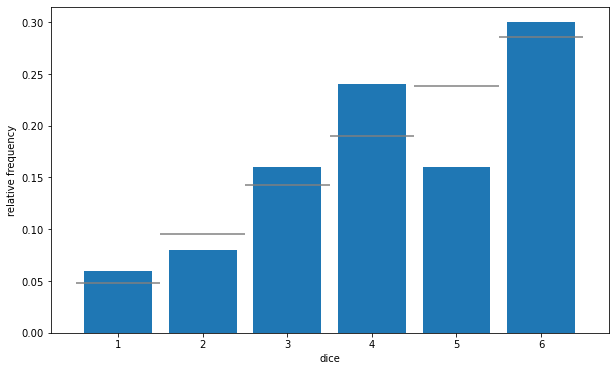

In [29]:
# 100번의 시도는 정해져 있는 확률과는 차이가 있다.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


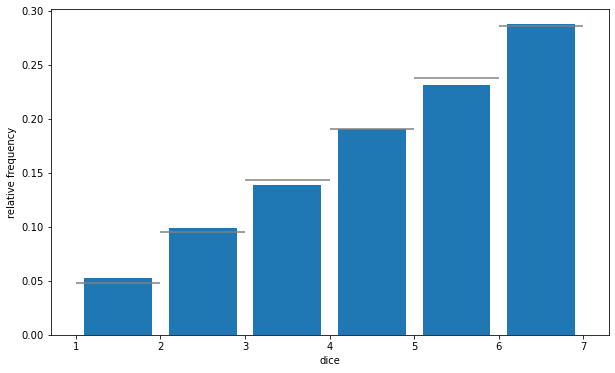

In [31]:
# 10000번 시도 ==>> 표본의 크기가 커질 수록 모집단의 확률분포와 가까워진다.

num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# ax.set_xticks(np.linspace(1.5, 6.5, 6))
# ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


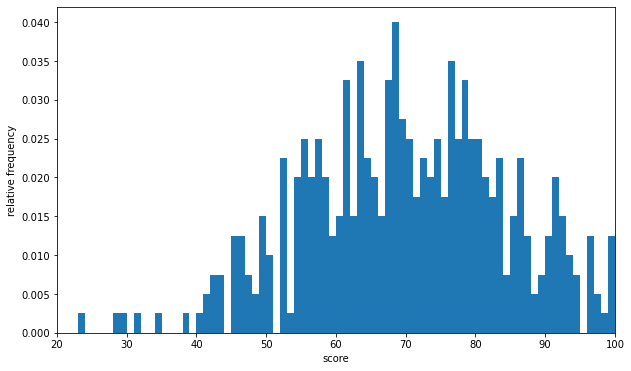

In [33]:
# 추론 통계에서의 확률
# 전교생의 시험점수의 분포를 확인하기 위해 계급폭을 1점으로 하여 히스토그램 작성

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


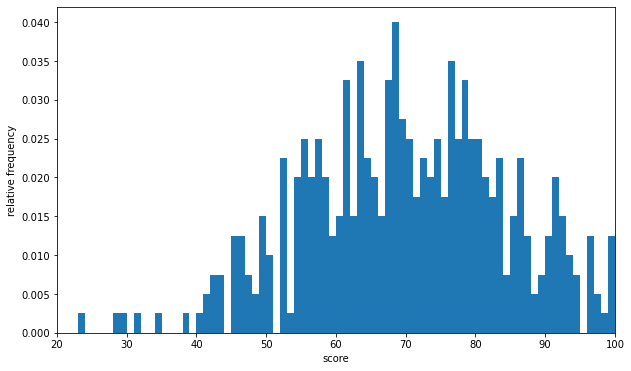

In [35]:
# 샘플 사이즈가 10000인 표본 추출

sample = np.random.choice(scores , 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

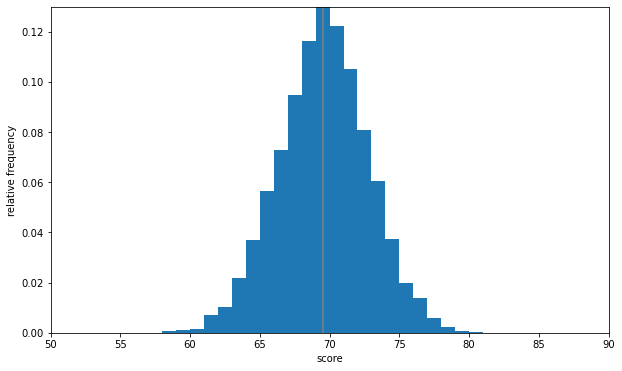

In [39]:
# 무작위로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 표시
# 모평균을 중심으로 분포한다

sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()